In [1]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import random
import pandas as pd
import xlsxwriter
import openpyxl as op
from PIL import Image
import os
import glob
import urllib.request
import urllib

In [2]:
id_ = input('아이디를 입력하세요:   ')
password_ = input('비밀번호를 입력하세요:   ')
search = input('검색할 내용을 입력 하세요:   ')
search_count = int(input('몇건을 검색 할까요:   '))

아이디를 입력하세요:   ldhyeon0891@naver.com
비밀번호를 입력하세요:   !dlaehd0891
검색할 내용을 입력 하세요:   창원여행
몇건을 검색 할까요:   20


In [88]:
chrome_path = 'C:\chromedriver\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'https://www.instagram.com/'
driver.get(url)
time.sleep(3)

## 한꺼번에 입력하거나 자주 실행하면 막힘.....ㅎㅎ
element = driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[1]/div/label/input')
driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[1]/div/label/input').click()
for i in id_:
    element.send_keys(i)
    time.sleep(random.uniform(0.1,0.3))

element = driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[2]/div/label/input')
driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[2]/div/label/input').click()
for i in password_:
    element.send_keys(i)
    time.sleep(random.uniform(0.1,0.3))
time.sleep(3)

driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[3]').click()
time.sleep(2)

## 자동로그인 설정
driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/div/div/div/button').click()
time.sleep(2)

## 알림설정
driver.find_element_by_xpath('/html/body/div[5]/div/div/div/div[3]/button[2]').click()
time.sleep(2)

driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[1]/div').click()
element = driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')

for i in search:
    element.send_keys(i)
    time.sleep(random.uniform(0.1,0.3))

time.sleep(2)
element.send_keys('\n')
time.sleep(3)
element.send_keys('\n')

time.sleep(6)
driver.find_element_by_class_name('_9AhH0').click()
time.sleep(3)

title_=[]
hash_tag = []
txt_ = []
img_url_ = []
img_url=[]

for i in range(search_count):
    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')

    try:
        title_text = soup.find('a',class_='O4GlU').get_text()
        title_.append(title_text)
    except:
        title_text = ''
        title_.append(title_text)
    try:
        txt_text = soup.select_one('div.MOdxS >span').get_text()
        txt_.append(txt_text)
    except:
        txt_text=''
        txt_.append(txt_text)
    
    review_soup= soup.select('a.xil3i')
    
    a = ''
    for i in review_soup:
        a += i.get_text()+' '
    hash_tag.append(a)
    
    try:
        driver.find_element_by_xpath('/html/body/div[6]/div[2]/div/div[2]').click()
    except:
        driver.find_element_by_xpath('/html/body/div[6]/div[2]/div/div').click()
    time.sleep(2)
    
## 자세히보기 x
driver.find_element_by_xpath('/html/body/div[6]/div[1]').click()
time.sleep(2)

## 이미지 다운
while True:
    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')
    list_a = soup.find('article','KC1QD').find_all('img')
    for i in list_a:
        list_url = i.get('src')
        img_url_.append(list_url)
    img_url = set(img_url_) ## 순서 안맞는 오류 이유 set함수 쓰면 자동 중복 제거와 함께 자동 정렬됨
    driver.execute_script("window.scrollTo(0, 50)") 
    time.sleep(3)
    if len(img_url)>= search_count: ## set 으로 중복 제거한 개수가 search_count보다 크면 멈춤
        img_url_ = list(img_url_)[:search_count] ## 순서대로 뽑은 img_url_을 search_count개수만큼 자름
        break

C:\Users\LIMDON~1\AppData\Local\Temp/ipykernel_9164/2466078683.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\LIMDON~1\AppData\Local\Temp/ipykernel_9164/2466078683.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element = driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[1]/div/label/input')
C:\Users\LIMDON~1\AppData\Local\Temp/ipykernel_9164/2466078683.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[1]/div/label/input').click()
C:\Users\LIMDON~1\AppData\Local\Temp/ipykernel_9164/2466078683.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element = driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[2]/div/label/input')
C:\Users\LIMDON~1\AppData\Lo

이미지 다운 및 엑셀 저장

In [91]:
## 사진 저장
img_dir = "E:/study/crawling/images"
os.makedirs(img_dir)
os.chdir(img_dir)
file_no = 1
for i in img_url_:
    urllib.request.urlretrieve(i,str(file_no)+'.jpg')
    file_no +=1

In [92]:
## 경로 다시 원위치
os.chdir("E:/study/crawling")

In [93]:
data_df = pd.DataFrame()
data_df['제목'] = title_
data_df['해쉬 태그'] = hash_tag
data_df['내용'] = txt_

In [95]:
data_df.to_excel('instar.xlsx')

In [96]:
## 파일 resize
files = glob.glob('./images/*')
for f in files[:]:
    img = Image.open(f)
    img_resize = img.resize((200,100))
    img_resize.save(f)

In [97]:
img_path = 'E:/study/crawling/images'
excel_path = 'E:/study/crawling/instar.xlsx'

In [98]:
## 엑셀 사진 저장
wb = op.load_workbook(excel_path)
ws = wb.active
row_max = ws.max_row
i=2
a = 1
for r in range(2, row_max+1):
    filename = op.drawing.image.Image(img_path+'/'+str(a)+'.jpg')
    ws.add_image(filename, "A"+str(i))
    ws.row_dimensions[i].height = 77
    i=i+1
    a=a+1
ws.column_dimensions['A'].width = 25
wb.save("instar_img.xlsx")

최종

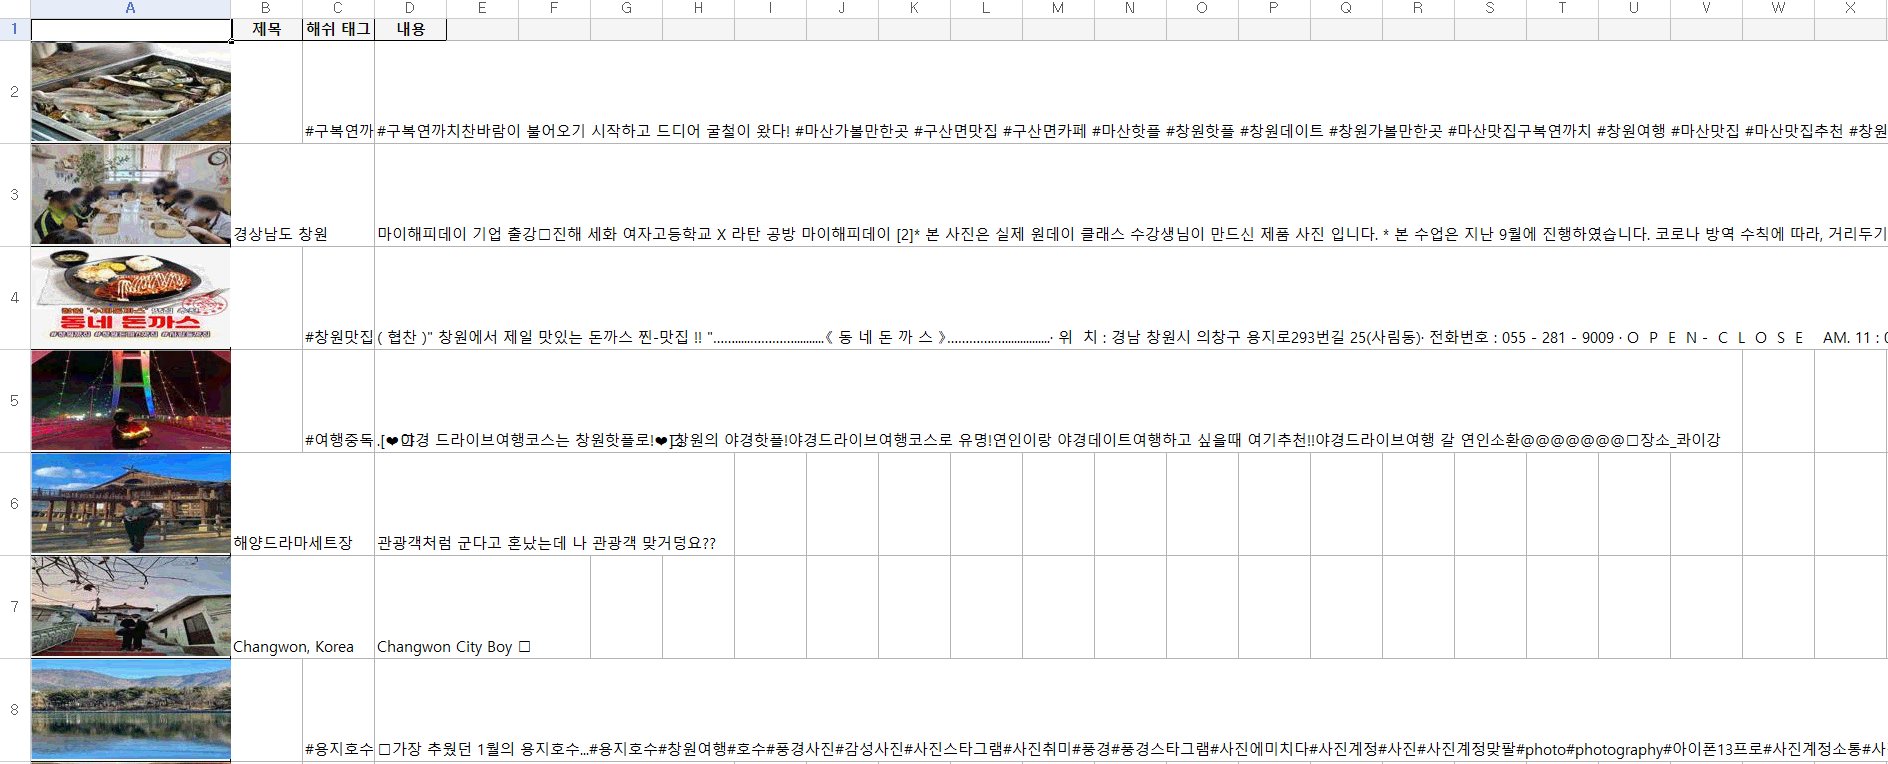